In [13]:
import cv2
from matplotlib import pyplot as plt

In [14]:
clf = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [15]:
img = cv2.imread('test\stressed_person.png')
#img=cv2.imread('Affectnet Dataset/anger/image0000407.jpg')

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\biswa\AppData\Local\Temp\ipykernel_13488\1003968100.py:1: SyntaxWarning: invalid escape sequence '\s'
  img = cv2.imread('test\stressed_person.png')


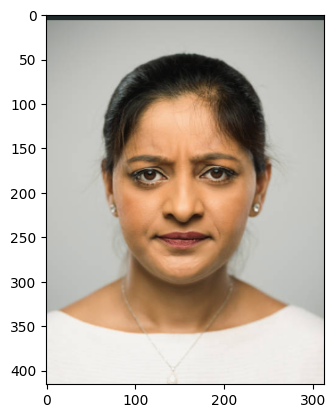

In [16]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [17]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

In [18]:
#clf.detectMultiScale??

In [19]:
faces = clf.detectMultiScale(img,scaleFactor =1.1,minNeighbors=5,minSize=(96,96),flags=cv2.CASCADE_SCALE_IMAGE)

In [20]:
faces

array([[ 53, 101, 202, 202]])

In [21]:
from matplotlib import pyplot as plt

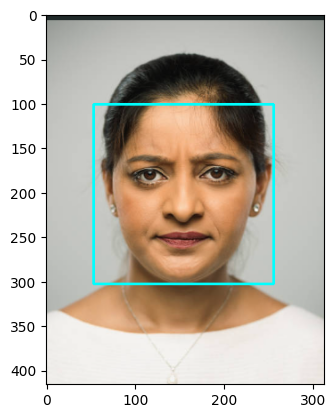

In [22]:
for(x,y,width,height) in faces:
    temp=cv2.rectangle(img,(x,y),(x+width,y+height),(255,255,0),2)
    temp=cv2.cvtColor(temp,cv2.COLOR_BGR2RGB)
    plt.imshow(temp)

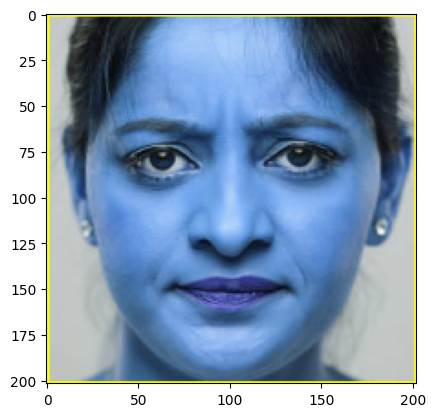

In [23]:
for(x,y,width,height) in faces:
    temp=cv2.rectangle(img,(x,y),(x+width,y+height),(255,255,0),2)
    plt.imshow(temp)
    plt.imshow(img[y:y+height, x:x+width])
    #plt.imshow(img[faces[0][1]:(faces[0][1]+faces[0][3]),faces[0][0]:(faces[0][0]+faces[0][3])])

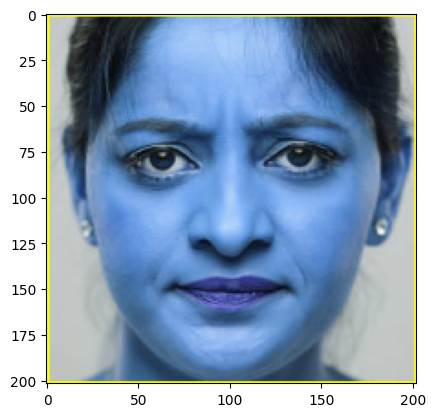

In [24]:
plt.imshow(img[faces[0][1]:(faces[0][1]+faces[0][3]),faces[0][0]:(faces[0][0]+faces[0][3])])

In [25]:
import os
from keras.models import load_model

In [26]:
new_model = load_model(os.path.join('models','Final_CNN_with25epochs.h5'))

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [27]:
#input_image =img[faces[0][1]:(faces[0][1]+faces[0][3]),faces[0][0]:(faces[0][0]+faces[0][3])]
input_image = cv2.cvtColor(img[faces[0][1]:(faces[0][1]+faces[0][3]),faces[0][0]:(faces[0][0]+faces[0][3])],cv2.COLOR_BGR2RGB)
#plt.imshow(input_image)

In [28]:
input_image.shape

(202, 202, 3)

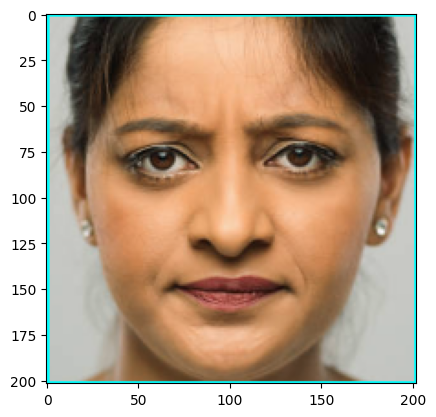

In [29]:
plt.imshow(input_image)

In [30]:
import tensorflow as tf
resize = tf.image.resize(input_image, (96,96))
resize.shape

TensorShape([96, 96, 3])

In [31]:
import numpy as np

In [32]:
resize=resize/255

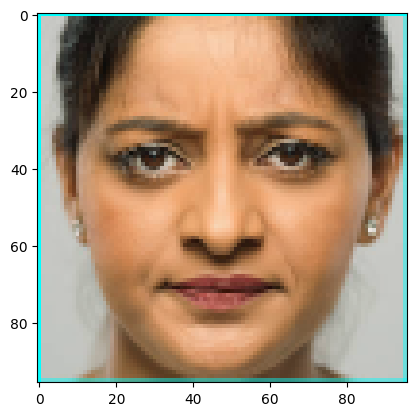

In [33]:
plt.imshow(resize)

In [34]:
result= new_model.predict(np.expand_dims(resize,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step


In [35]:
result

array([[0.12941766, 0.11383781, 0.12409376, 0.1080412 , 0.15505257,
        0.10103357, 0.1059204 , 0.16260298]], dtype=float32)

In [36]:
label_mapping={
0: 'anger',
 1: 'contempt',
 2: 'disgust',
 3: 'fear',
 4: 'happy',
 5: 'neutral',
 6: 'sad',
 7: 'surprise'}

In [37]:
classify_result = np.argmax(result)
classify_result

7

In [38]:
sum=0
for i in range(0,4):
    sum+=result[0][i]
sum+=result[0][7]
print(sum)

0.6379934102296829


In [39]:
if sum <= 0.5:
    print("The person is not stressed")
else:
    print("The preson is stressed")

The preson is stressed
